# Coffee Sales

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coffee_sales = pd.read_excel('Coffee Shop Sales.xlsx', index_col=None)  

In [3]:
coffee_sales

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
coffee_sales.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


# Clean + Manipulate Data

## Change data types

In [5]:
coffee_sales['transaction_time'] = pd.to_datetime(coffee_sales['transaction_time'], format='%H:%M:%S')

In [6]:
# object columns
coffee_sales['store_location'] = coffee_sales['store_location'].astype('string')
coffee_sales['product_category'] = coffee_sales['product_category'].astype('string')
coffee_sales['product_type'] = coffee_sales['product_type'].astype('string')
coffee_sales['product_detail'] = coffee_sales['product_detail'].astype('string')

Now, we want to extract the `transaction_date` and `transaction_time` columns to looks at months/days/hours of the day/ etc. more closely. 

In [7]:
coffee_sales['year'] = coffee_sales['transaction_date'].dt.year
coffee_sales['month'] = coffee_sales['transaction_date'].dt.month
coffee_sales['day'] = coffee_sales['transaction_date'].dt.day
coffee_sales['hour'] = coffee_sales['transaction_time'].dt.hour

In [8]:
coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  string        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  string        
 9   product_type      149116 non-null  string        
 10  product_detail    149116 non-null  string        
 11  year              149116 non-null  int32         
 12  month             149116 non-null  int32         
 13  day               149116 non-null  int32         
 14  hour

## Add extra features

In [9]:
coffee_sales['total_price'] = coffee_sales['unit_price']*coffee_sales['transaction_qty']

In [10]:
coffee_sales

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,total_price
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6.00
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,6.20
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,1,1,7,9.00
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,1,1,7,2.00
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,1900-01-01 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,6,30,20,5.00
149112,149453,2023-06-30,1900-01-01 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,6,30,20,6.00
149113,149454,2023-06-30,1900-01-01 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023,6,30,20,3.00
149114,149455,2023-06-30,1900-01-01 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023,6,30,20,3.75


In [11]:
# # add a moving average
# coffee_sales['moving_avg'] = coffee_sales['total_price'].rolling(window=len(coffee_sales)//6).mean() 
# coffee_sales

# Explore the data

## What are the different product categories, types, and details?

In [12]:
coffee_sales.product_category.unique()

<StringArray>
[            'Coffee',                'Tea', 'Drinking Chocolate',
             'Bakery',           'Flavours',          'Loose Tea',
       'Coffee beans', 'Packaged Chocolate',            'Branded']
Length: 9, dtype: string

In [13]:
coffee_sales.product_type.unique()

<StringArray>
['Gourmet brewed coffee',       'Brewed Chai tea',         'Hot chocolate',
           'Drip coffee',                 'Scone',      'Barista Espresso',
      'Brewed Black tea',      'Brewed Green tea',     'Brewed herbal tea',
              'Biscotti',                'Pastry', 'Organic brewed coffee',
 'Premium brewed coffee',         'Regular syrup',            'Herbal tea',
         'Gourmet Beans',         'Organic Beans',      'Sugar free syrup',
    'Drinking Chocolate',         'Premium Beans',              'Chai tea',
           'Green beans',        'Espresso Beans',             'Green tea',
     'Organic Chocolate',            'Housewares',             'Black tea',
     'House blend Beans',              'Clothing']
Length: 29, dtype: string

In [14]:
coffee_sales.product_detail.unique()

<StringArray>
[                 'Ethiopia Rg',     'Spicy Eye Opener Chai Lg',
            'Dark chocolate Lg',  'Our Old Time Diner Blend Sm',
                'Oatmeal Scone',    'Columbian Medium Roast Sm',
                     'Latte Rg',            'Dark chocolate Rg',
     'Spicy Eye Opener Chai Rg',                  'Ethiopia Lg',
                 'Earl Grey Lg',         'Ouro Brasileiro shot',
        'Serenity Green Tea Lg',           'Jumbo Savory Scone',
               'Lemon Grass Rg', 'Sustainably Grown Organic Lg',
            'Hazelnut Biscotti',                   'Cappuccino',
               'Lemon Grass Lg',      'Chocolate Chip Biscotti',
                'Peppermint Lg',          'Chocolate Croissant',
                        'Latte',                 'Brazilian Rg',
                 'Brazilian Lg',    'Columbian Medium Roast Rg',
      'Morning Sunrise Chai Rg',      'Morning Sunrise Chai Lg',
  'Our Old Time Diner Blend Lg', 'Sustainably Grown Organic Rg',
        'Sc

## What are the different locations?

In [15]:
coffee_sales.store_location.unique()

<StringArray>
['Lower Manhattan', "Hell's Kitchen", 'Astoria']
Length: 3, dtype: string

## What are the top 3 `product categories` (coffee, tea, etc.) that have the most quantities sold?

In [16]:
coffee_sales[['product_category', 'transaction_qty']].groupby(
    "product_category"
).sum().sort_values(by='transaction_qty', ascending=False).head(3)

,transaction_qty
product_category,
Coffee,89250
Tea,69737
Bakery,23214


<Axes: xlabel='product_category'>

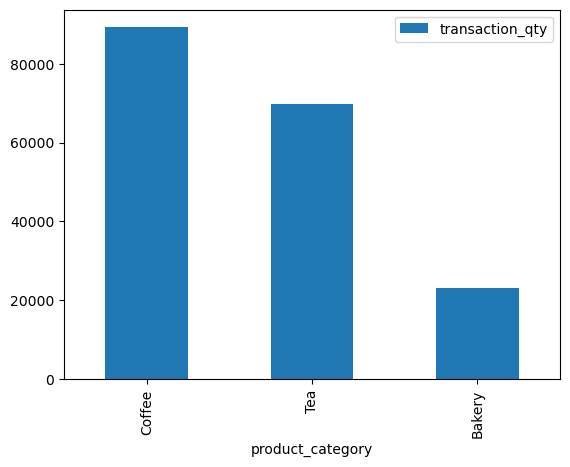

In [17]:
coffee_sales[['product_category', 'transaction_qty']].groupby(
    "product_category"
).sum().sort_values(by='transaction_qty', ascending=False).head(3).plot(kind='bar')

## Which `product categories` have generated the top 5 revenues over the year of 2023?

In [18]:
coffee_sales[['product_category', 'total_price']].groupby(
    "product_category"
).sum().sort_values(by='total_price', ascending=False).head(5)

,total_price
product_category,
Coffee,269952.45
Tea,196405.95
Bakery,82315.64
Drinking Chocolate,72416.00
Coffee beans,40085.25


<Axes: xlabel='product_category'>

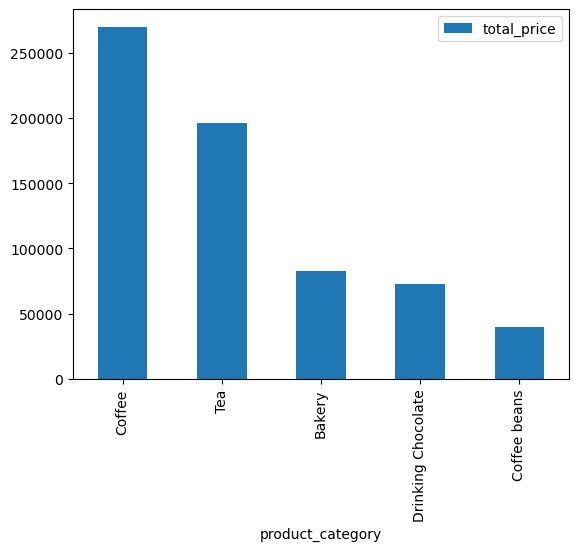

In [19]:
coffee_sales[['product_category', 'total_price']].groupby(
    "product_category"
).sum().sort_values(by='total_price', ascending=False).head(5).plot(kind='bar')

Coffee was the product category with the highest revenue for 2023

## What are the top 5 most popular product types in terms of transactions?

In [20]:
coffee_sales[['product_type', 'transaction_qty']].groupby(
    'product_type'
).sum().sort_values(by='transaction_qty', ascending=False).head(5)

,transaction_qty
product_type,
Brewed Chai tea,26250
Gourmet brewed coffee,25973
Barista Espresso,24943
Brewed Black tea,17462
Hot chocolate,17457


<Axes: xlabel='product_type'>

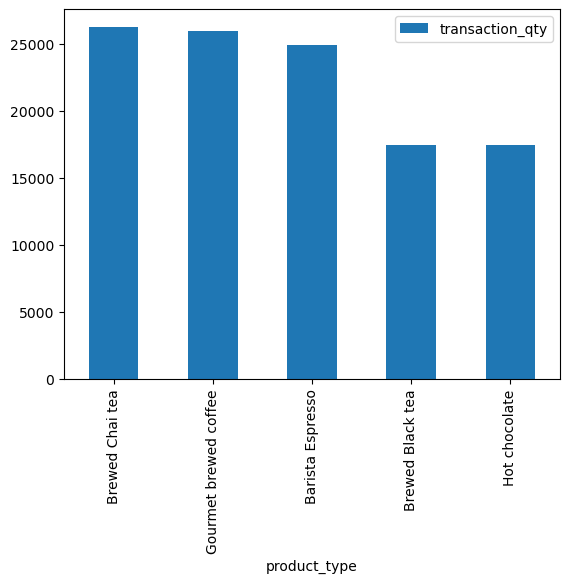

In [21]:
coffee_sales[['product_type', 'transaction_qty']].groupby(
    'product_type'
).sum().sort_values(by='transaction_qty', ascending=False).head(5).plot(kind='bar')

## What about `product_detail`?

In [22]:
coffee_sales[['product_detail', 'transaction_qty']].groupby(
    'product_detail'
).sum().sort_values(by='transaction_qty', ascending=False).head(5)

,transaction_qty
product_detail,
Earl Grey Rg,4708
Dark chocolate Lg,4668
Morning Sunrise Chai Rg,4643
Latte,4602
Peppermint Rg,4564


<Axes: xlabel='product_detail'>

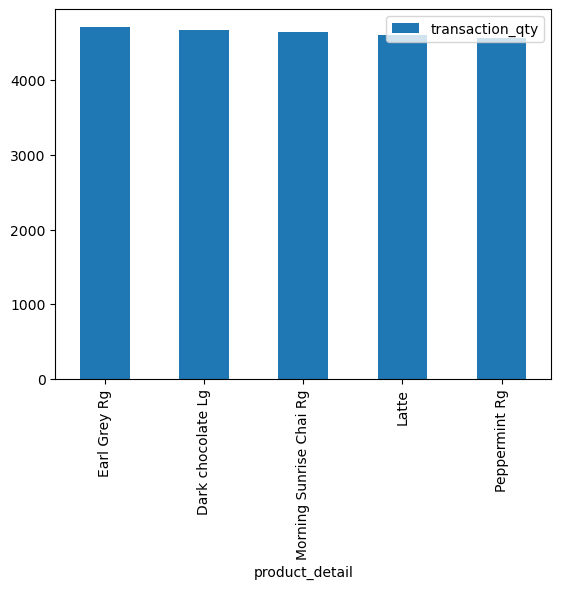

In [23]:
coffee_sales[['product_detail', 'transaction_qty']].groupby(
    'product_detail'
).sum().sort_values(by='transaction_qty', ascending=False).head(5).plot(kind='bar')

## What is the total revenue produced in the entire year of 2023?

In [24]:
round(coffee_sales.total_price.sum(), 2)

698812.33

## Which location generated the most revenue?

In [25]:
coffee_sales[['store_location', 'total_price']].groupby(
    'store_location'
).sum().sort_values(by='total_price', ascending=False)

,total_price
store_location,
Hell's Kitchen,236511.17
Astoria,232243.91
Lower Manhattan,230057.25


array([<Axes: ylabel='total_price'>], dtype=object)

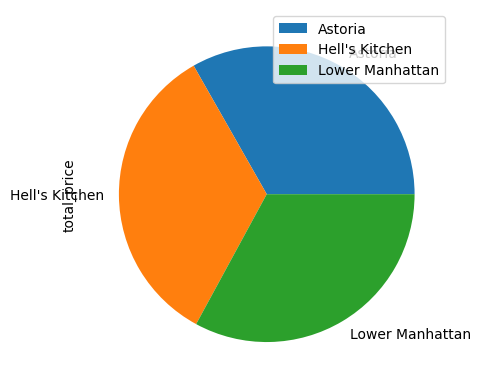

In [26]:
coffee_sales[['store_location', 'total_price']].groupby(
    'store_location'
).sum().plot(kind='pie', subplots=True)

## What time of day was the most popular in 2023 in terms of number of transactions?

In [27]:
coffee_sales[['hour', 'transaction_qty']].groupby(
    'hour'
).sum().sort_values(by='transaction_qty', ascending=False)

,transaction_qty
hour,
10,26713
9,25370
8,25197
7,19449
11,14035
15,12923
14,12907
16,12881
17,12700


<Axes: xlabel='hour'>

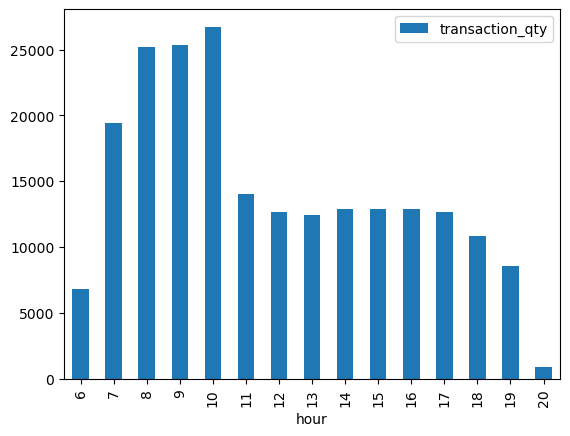

In [28]:
coffee_sales[['hour', 'transaction_qty']].groupby(
    'hour'
).sum().plot(kind='bar')

## Which months were the most popular in 2023 in terms of number of transactions?

In [29]:
coffee_sales[['month', 'transaction_qty']].groupby(
    'month'
).sum().sort_values(by='transaction_qty', ascending=False)

,transaction_qty
month,
6,50942
5,48233
4,36469
3,30406
1,24870
2,23550


In [30]:
# in terms of revenue?

coffee_sales[['month', 'total_price']].groupby(
    'month'
).sum().sort_values(by='total_price', ascending=False)

,total_price
month,
6,166485.88
5,156727.76
4,118941.08
3,98834.68
1,81677.74
2,76145.19


<Axes: xlabel='month'>

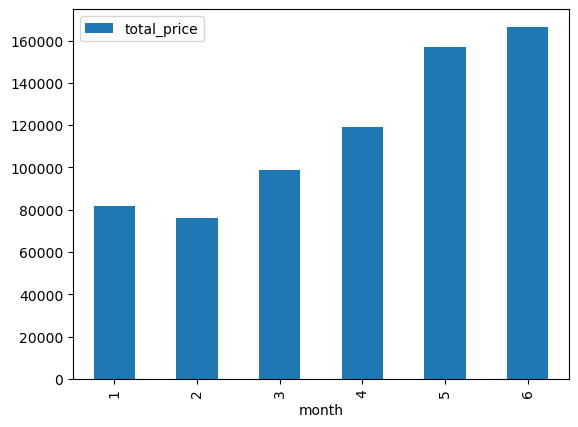

In [31]:
coffee_sales[['month', 'total_price']].groupby(
    'month'
).sum().plot(kind='bar')

There is data only for months 1-6

## Which are the most popular product details for each month?

In [32]:
coffee_sales[['product_detail', 'month', 'transaction_qty']].groupby(
    ['month', 'product_detail']
).sum().sort_values(by=['month', 'transaction_qty'], ascending=False).groupby('month').head(1)

,,transaction_qty
month,product_detail,
6,Earl Grey Rg,1109
5,Earl Grey Rg,1075
4,Dark chocolate Lg,833
3,Earl Grey Rg,685
2,Peppermint Rg,542
1,Brazilian Lg,551


In [33]:
# top 3 product details

coffee_sales[['product_detail', 'month', 'transaction_qty']].groupby(
    ['month', 'product_detail']
).sum().sort_values(by=['month', 'transaction_qty'], ascending=False).groupby('month').head(3)

transaction_qty
month product_detail                              
6     Earl Grey Rg                            1109
      Dark chocolate Lg                       1107
      Our Old Time Diner Blend Sm             1096
5     Earl Grey Rg                            1075
      Peppermint Rg                           1059
      Traditional Blend Chai Rg               1044
4     Dark chocolate Lg                        833
      Morning Sunrise Chai Rg                  801
      Latte                                    786
3     Earl Grey Rg                             685
      Brazilian Rg                             681
      Morning Sunrise Chai Rg                  680
2     Peppermint Rg                            542
      Dark chocolate Lg                        527
      Latte                                    524
1     Brazilian Lg                             551
      Ethiopia Sm                              548
      Columbian Medium Roast Rg                547

## What about the top 5 product types for each month?

In [34]:
coffee_sales[['product_type', 'month', 'transaction_qty']].groupby(
    ['month', 'product_type']
).sum().sort_values(by=['month', 'transaction_qty'], ascending=False).groupby('month').head(5)

transaction_qty
month product_type                          
6     Gourmet brewed coffee             6347
      Brewed Chai tea                   6174
      Barista Espresso                  5965
      Brewed Black tea                  4136
      Hot chocolate                     4121
5     Brewed Chai tea                   5934
      Gourmet brewed coffee             5761
      Barista Espresso                  5556
      Brewed herbal tea                 3990
      Hot chocolate                     3930
4     Brewed Chai tea                   4528
      Gourmet brewed coffee             4396
      Barista Espresso                  4254
      Hot chocolate                     2952
      Brewed herbal tea                 2927
3     Brewed Chai tea                   3750
      Gourmet brewed coffee             3614
      Barista Espresso                  3560
      Brewed Black tea                  2508
      Hot chocolate                     2475
2     Brewed Chai tea                   2853
      Gourmet brewed coffee             2837
      Barista Espresso                  2747
      Hot chocolate                     1964
      Brewed Black tea                  1954
1     Gourmet brewed coffee             3018
      Brewed Chai tea                   3011
      Barista Espresso                  2861
      Hot chocolate                     2015
      Brewed Black tea                  2014

# Data Visualizations

<Axes: xlabel='month'>

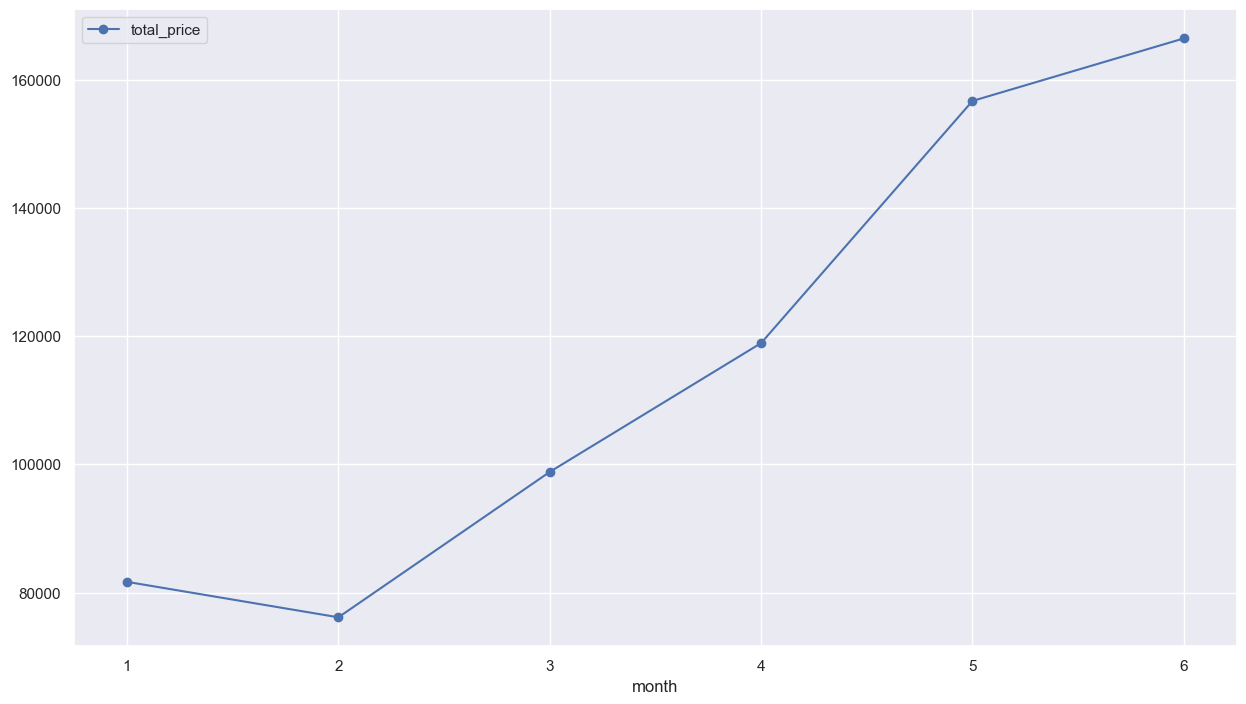

In [35]:
sns.set_theme(rc={'figure.figsize':(15,8.27)})
coffee_sales[['month', 'total_price']].groupby("month").sum().plot(marker='o')

<Axes: xlabel='transaction_date'>

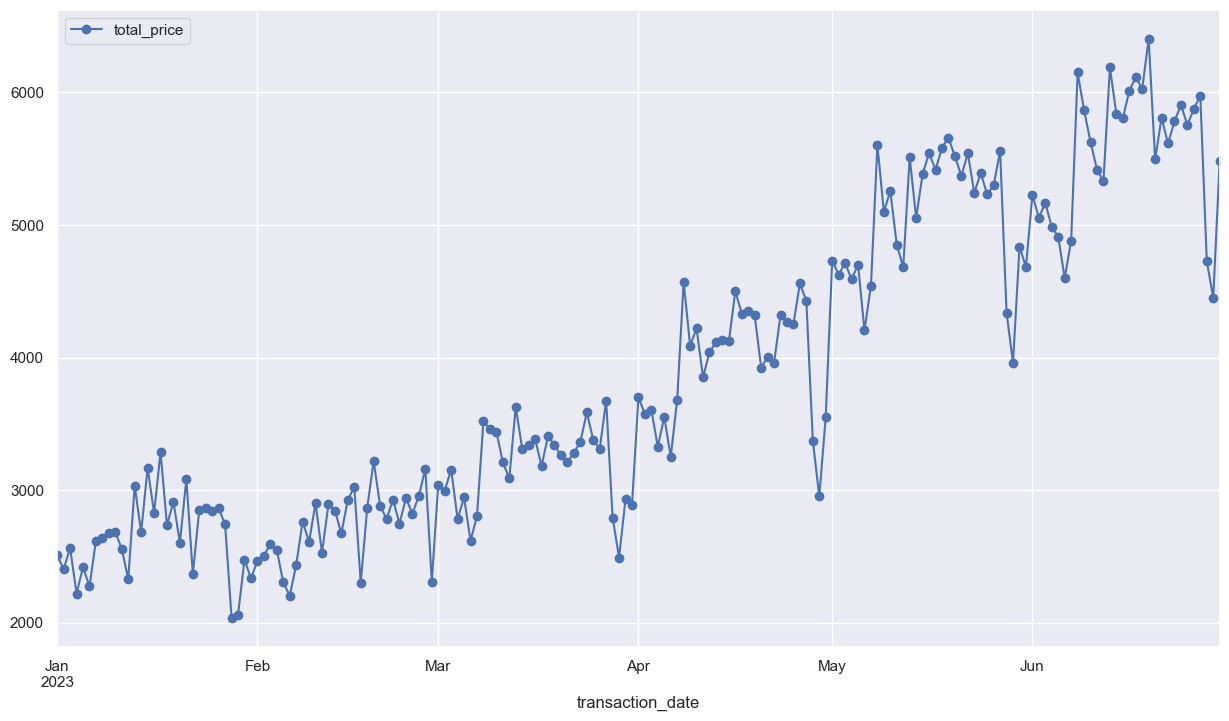

In [36]:
coffee_sales[['transaction_date', 'total_price']].groupby('transaction_date').sum().plot(marker='o')
